In [110]:
import pandas as pd
from datetime import datetime 
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
import numpy as np

In [111]:
df = pd.read_csv("Migraines.csv")
mask = (df["Metric"]=="Migraine")&(df["Value"]==1)
df_clean = df[mask].drop(columns="Metric")
df_clean.reset_index(inplace=True,drop=True)
# df_clean["Date"] = pd.to_datetime(df_clean['Date'])
df_clean["Date"] = pd.to_datetime(df_clean['Date']).dt.tz_localize(None)

In [112]:
df_weather = pd.read_csv("weather_data.csv")
df_weather["datetime"] = pd.to_datetime(df_weather['datetime'])
df_weather.keys()

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

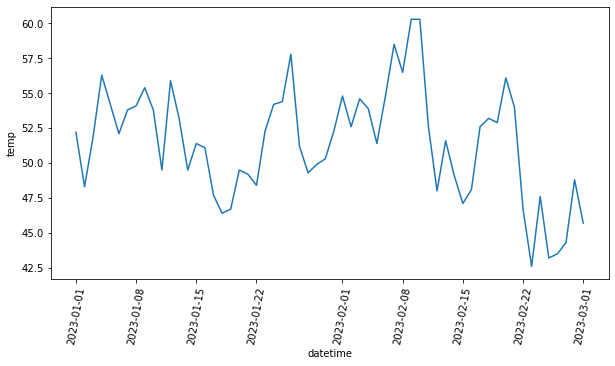

In [113]:
# df_weather['temp']
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(data=df_weather,x="datetime",y="temp")
plt.xticks(rotation = 80);

In [116]:
target = np.zeros(len(df_weather))
for i in range(len(df_weather)):
    for j in range(len(df_clean)):
        if (df_weather['datetime'][i] == df_clean["Date"][j]):
            target[i]=1
df_weather['migraine'] = np.asarray(target,int)
df_weather["temp_dt"]=np.append(0,df_draft['temp'].values[1:]-df_draft['temp'].values[:-1])

In [289]:
# asdf = df_weather['datetime'][df_weather['migraine']==1]
# # df_weather["dt_since_last"] = np.append(0,asdf.values[1:]-asdf.values[:-1])
# qwer = (asdf.values[1:]-asdf.values[:-1])
# # qwer/1e11

In [290]:
df_draft = df_weather[['datetime','temp','humidity','precip','temp_dt','migraine']]

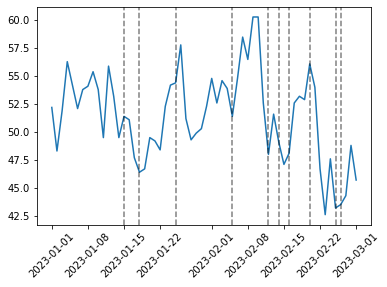

In [291]:
# Temperature
plt.plot(df_draft["datetime"],df_draft["temp"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

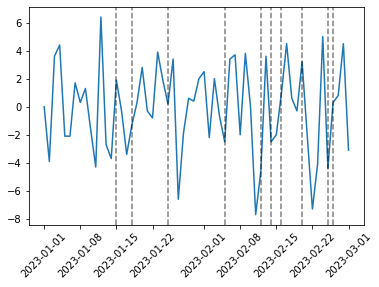

In [292]:
# change in temperature
plt.plot(df_draft["datetime"],df_draft["temp_dt"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

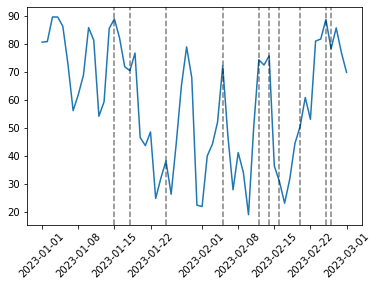

In [293]:
# humidity?
plt.plot(df_draft["datetime"],df_draft["humidity"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

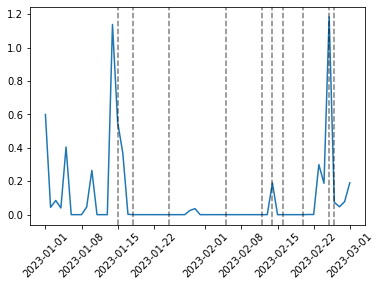

In [294]:
# precip
plt.plot(df_draft["datetime"],df_draft["precip"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

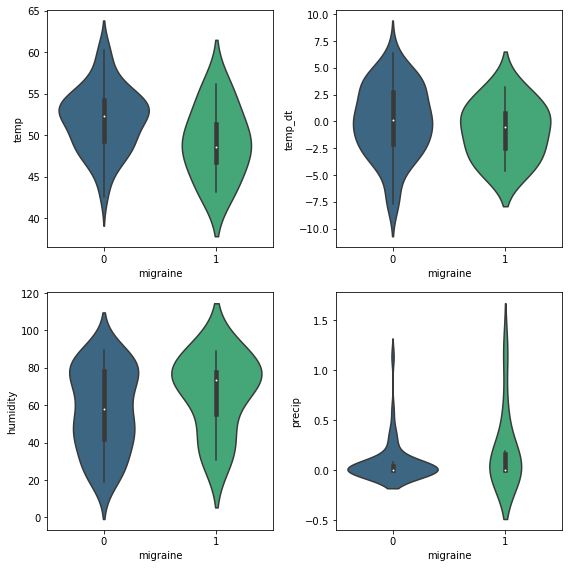

In [214]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
sns.violinplot(x='migraine',y='temp',data=df_draft,palette='viridis',ax=ax[0,0])
sns.violinplot(x='migraine',y='temp_dt',data=df_draft,palette='viridis',ax=ax[0,1])
sns.violinplot(x='migraine',y='humidity',data=df_draft,palette='viridis',ax=ax[1,0])
sns.violinplot(x='migraine',y='precip',data=df_draft,palette='viridis',ax=ax[1,1])
plt.tight_layout()
# sns.violinplot(x='sex', y='bill_length_mm',data=test,palette='viridis')

In [263]:
X = df_draft.drop(columns=["migraine","datetime"])
y = df_draft['migraine']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.90, random_state=0)

from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [264]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
R2 = clf.score(X_train,y_train) 
# predictions = model.predict(X_test)


In [265]:
# y_test,y_pred

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
print(accuracy),print(precision),print(recall)

0.7592592592592593
0.25
0.2222222222222222


(None, None, None)

In [269]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)
print("accuracy = ",accuracy)

# plt.imshow(confusion_matrix(y_test, y_pred))

True Positive(TP)  =  2
False Positive(FP) =  7
True Negative(TN)  =  39
False Negative(FN) =  6
accuracy =  0.7592592592592593


In [155]:
# df_draft#[df_draft['migraine'].values]
# mig_mask = np.asarray(df_draft['migraine'],bool)
# df_draft[mig_mask]['datetime']
# df_draft[mig_mask]['datetime'].values[0]